In [1]:
#blood transfusion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
data = fetch_openml(name='blood-transfusion-service-center')

C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


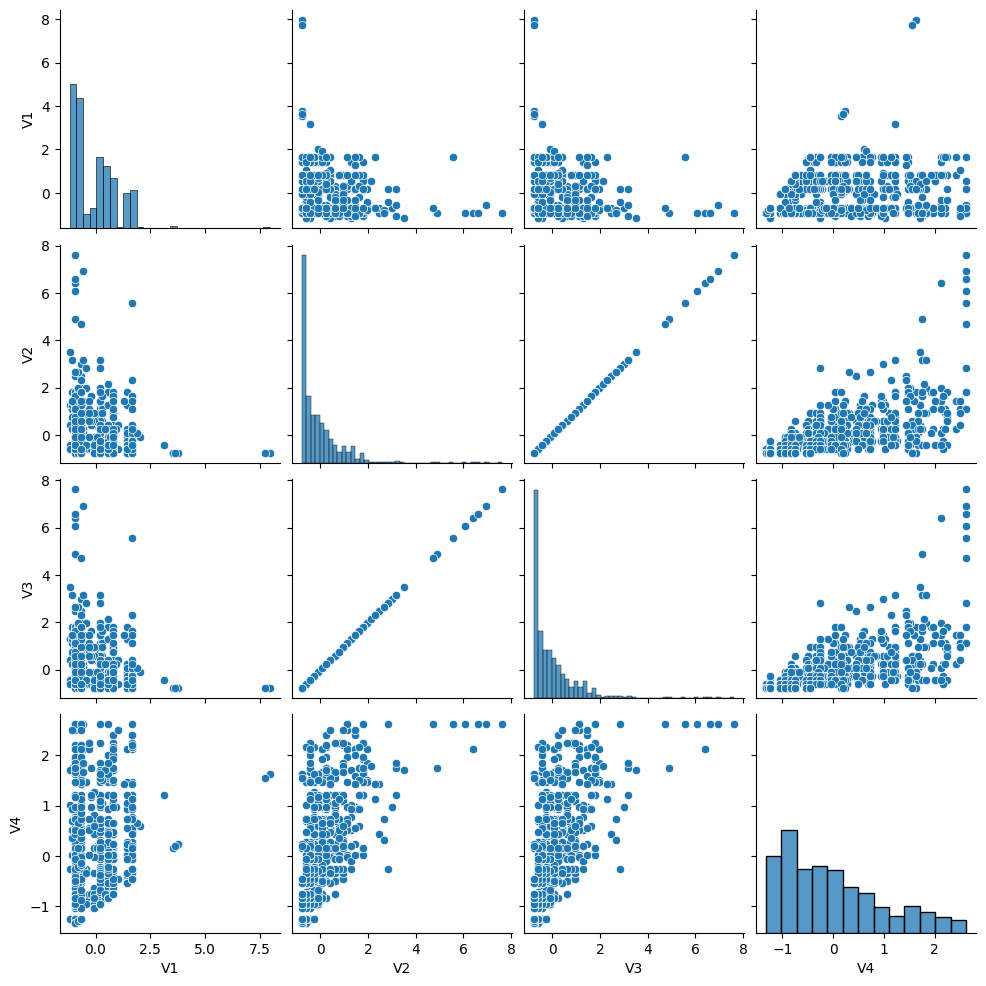

In [3]:
df = data.data
import seaborn as sns
#sns.pairplot(df)
from sklearn import preprocessing
a = preprocessing.scale(df)
sdf = pd.DataFrame(a, columns=df.columns)
sns.pairplot(sdf)

In [4]:
X, y = data.data, data.target
X = df
X = X.values
y = y.values
y = y.astype("float") - 1
num_split = 600
X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]
np.random.seed(0)
shuffle_index = np.random.permutation(num_split)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]



178

In [56]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
from sklearn.linear_model import SGDClassifier
clf2 = SGDClassifier(random_state=0)
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)
score1 = cross_val_score(clf1, X_train, y_train, cv=3, scoring="accuracy")
score2 = cross_val_score(clf2, X_train, y_train, cv=3, scoring="accuracy")
score1

array([0.745, 0.74 , 0.74 ])

In [57]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True,random_state=100)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(clf1)
    X_train_fold = X_train[train_index]
    y_train_folds = (y_train[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train[test_index])
    scaler = preprocessing.StandardScaler().fit(X_train_fold)
    X_train_fold = scaler.transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)
    
    clone_clf.fit(X_train_fold, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(n_correct / len(y_pred)))


0.7700
0.7350
0.7250


In [60]:

from sklearn.model_selection import cross_val_predict
np.random.seed(0)
y_train_pred = cross_val_predict(clf1, X_train, y_train, cv=3)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
pd.DataFrame(cm,
             columns=pd.MultiIndex.from_product([['Prediction'], ["Negative", "Positive"]]),
             index=pd.MultiIndex.from_product([["Actual"], ["Negative", "Positive"]]))

Prediction         
                  Negative Positive
Actual Negative        422       14
       Positive        141       23

In [64]:
from sklearn.metrics import precision_score, recall_score
p = precision_score(y_train, y_train_pred)
r = recall_score(y_train, y_train_pred)
print(p,r)
from sklearn.metrics import f1_score
f1 = f1_score(y_train, y_train_pred)
print(f1)

0.6216216216216216 0.1402439024390244
0.22885572139303487


In [75]:
n = 222 
clf1.fit(X_train, y_train)
y_sc = clf1.decision_function(X[n].reshape(1,-1))
print(y[n], y_sc)
for k in range(len(X)):
    if clf1.decision_function(X[k].reshape(1,-1)) > 0:
        print(y[k])

1.0 [-0.70863859]
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0


In [ ]:
y_scores = cross_val_predict(clf1, X_train, y_train, cv=3, method='decision_function' )
plt.figure(figsize=(6,6))
plt.hist(y_scores)
plt.show()

C:\Users\informatika\AppData\Local\Temp\ipykernel_13496\3507805978.py:8: RuntimeWarning: divide by zero encountered in divide
  f = 2/((1/prec[:-1])+1/rec[1:])


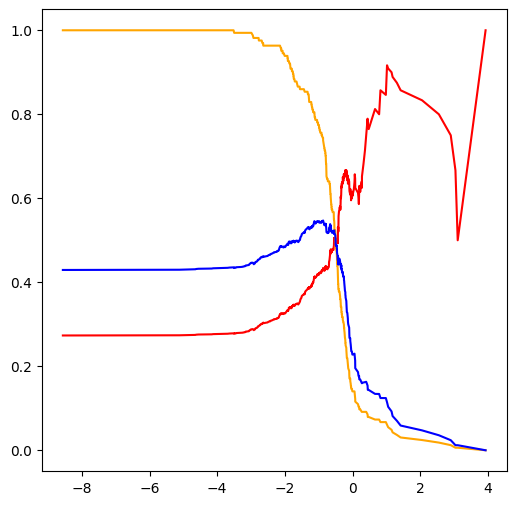

In [86]:
from sklearn.metrics import precision_recall_curve
precision, recall, th = precision_recall_curve(y_train, y_scores)
len(th)
def plot_curve(prec, rec, thr):
    plt.figure(figsize=(6,6))
    plt.plot(thr, prec[:-1], c="red")
    plt.plot(th, rec[:-1], c="orange")
    f = 2/((1/prec[:-1])+1/rec[1:])
    plt.plot(th, f, c="blue")
    plt.show()
plot_curve(precision, recall, th)

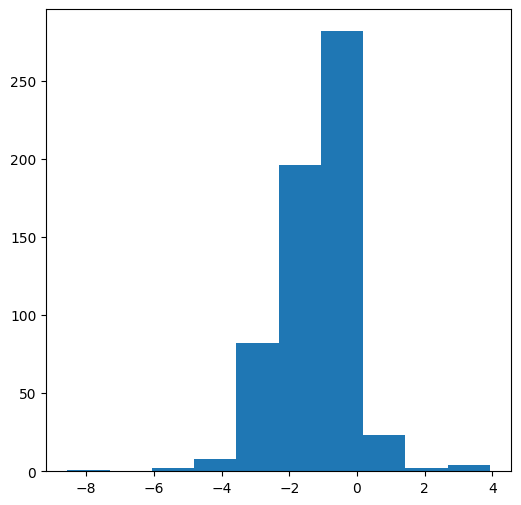

In [67]:
y_scores = cross_val_predict(clf1, X_train, y_train, cv=3, method='decision_function' )
plt.figure(figsize=(6,6))
plt.hist(y_scores)
plt.show()